In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [138]:
ds = xr.open_dataset('data/nwp_regrid_197901_202508.nc')

In [139]:
stacked = ds.vorticity.stack(space=('lon', 'lat')).fillna(0)

In [140]:
n_clusters = 9
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage='ward'
)
ward.fit(stacked)

,n_clusters,9
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [141]:
label = ward.labels_

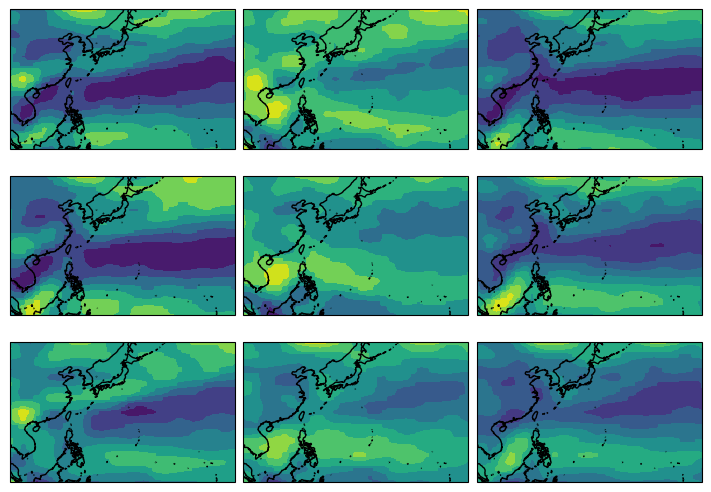

In [142]:
ncols, nrows = (3, 3)
figsize = (7, 5)

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=figsize,
    subplot_kw={'projection': ccrs.PlateCarree()},
    layout='constrained'
)

l = 0
for row in range(nrows):
    for col in range(ncols):
        ax = axes[row, col]
        cs = ax.contourf(
            ds.lon, ds.lat,
            ds.vorticity[label == l, :, :].mean('time'),
            transform=ccrs.PlateCarree()
        )
        ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='k')
        l += 1

plt.show()

In [143]:
stacked = ds.ssta.stack(space=('lon', 'lat')).fillna(0)
n_clusters = 9
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage='ward'
)
ward.fit(stacked)
label = ward.labels_

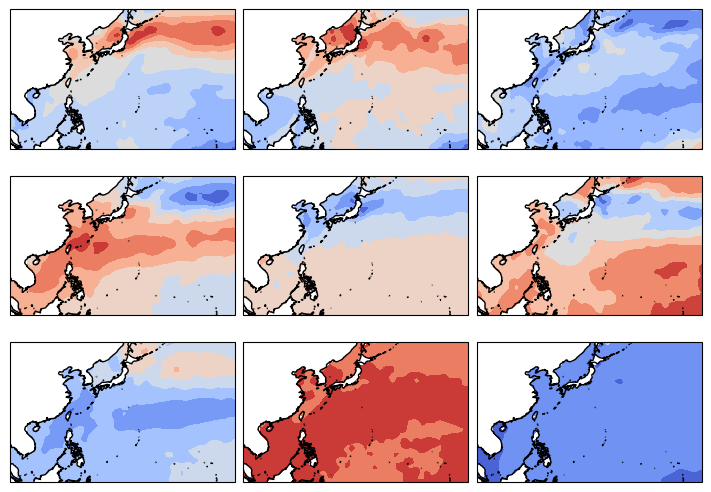

In [144]:
ncols, nrows = (3, 3)
figsize = (7, 5)

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=figsize,
    subplot_kw={'projection': ccrs.PlateCarree()},
    layout='constrained'
)

l = 0
for row in range(nrows):
    for col in range(ncols):
        ax = axes[row, col]
        cs = ax.contourf(
            ds.lon, ds.lat,
            ds.ssta[label == l, :, :].mean('time'),
            transform=ccrs.PlateCarree(),
            cmap='coolwarm'
        )
        ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='k')
        l += 1

plt.show()